# <strong> ROAD TRAFFIC ACCIDENTS (RTAs) PREDICTION MODEL </strong>

## <strong>ROAD TRAFFIC ACCIDENT(RTAs)  PREDICTION MODEL USING GRADIANT BOOSTING METHODS, RANDOM FOREST ,LOGESTIC REGRESSION AND SVM</strong>

### <strong>A little introduction about the objective, the model and the dataset</strong>

Road traffic accidents (RTAs) continue to be a significant public health concern and a major cause of injuries and fatalities worldwide. According to the World Health Organization (WHO), approximately 1.35 million people die each year due to road traffic accidents, with an additional 20-50 million sustaining non-fatal injuries, often resulting in long-term disabilities. The economic and social costs associated with these accidents are substantial and place a burden on societies and healthcare systems. Therefore, there is an urgent need to develop effective strategies to mitigate the occurrence and severity of road traffic accidents.
   
Accurate and timely prediction of accident severity is crucial for effective accident management and the allocation of appropriate resources. By understanding the factors that contribute to the severity of road traffic accidents, authorities can develop targeted interventions, improve emergency response systems, and implement preventive measures to reduce the occurrence and impact of accidents.
Predictive models that estimate accident severity can assist in decision-making processes related to resource allocation and emergency response, leading to improved outcomes in terms of injury prevention, reduced mortality, and efficient utilization of available resources


        The main objective of this thesis is to develop a predictive model using ensemble machine learning techniques to estimate the severity of road traffic accidents in Addis Ababa, Ethiopia. The dataset used in this study has been collected from the Addis Ababa Police Commission and contains comprehensive information on various factors related to accidents, including weather conditions, road characteristics, vehicle types, and human factors.

## Now let's start buiding our models

  We start by importing the necessary values

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load the dataset
data = pd.read_csv(r'C:\Users\Eyosi\Desktop\Urgent\ETH_Road_ Traffic_ Dataset (1) (4).csv')

### <strong>Let's explore our data </strong>

In [3]:
data.head(11)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,1:00:00,Thursday,31-50,Female,Above high school,Employee,1-2yr,Automobile,Above 10yr,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Fatal injury
1,17:02:00,Friday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Saturday,18-30,Female,Junior high school,Employee,1-2yr,Lorry (41?100Q),NaN,No defect,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Slight Injury
3,18:02:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),NaN,No defect,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,19:02:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,...,U-Turn,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,NaN,No defect,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Saturday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Above 10yr,No defect,...,U-Turn,na,na,na,na,NaN,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Sunday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),1-2yr,No defect,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,2-5yrs,No defect,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10174 entries, 0 to 10173
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         10174 non-null  object
 1   Day_of_week                  10174 non-null  object
 2   Age_band_of_driver           10174 non-null  object
 3   Sex_of_driver                10174 non-null  object
 4   Educational_level            9599 non-null   object
 5   Vehicle_driver_relation      9721 non-null   object
 6   Driving_experience           9492 non-null   object
 7   Type_of_vehicle              9377 non-null   object
 8   Service_year_of_vehicle      6866 non-null   object
 9   Defect_of_vehicle            6478 non-null   object
 10  Area_accident_occured        9974 non-null   object
 11  Lanes_or_Medians             9847 non-null   object
 12  Road_allignment              10052 non-null  object
 13  Types_of_Junction            10

## <strong>Data preprocesing and cleaning</strong>

  Data preprocessing and cleaning play a crucial role in the development of predictive machine learning models. It is essential to ensure that the data used for training and testing is of high quality and suitable for the chosen model. 

  Data preprocessing involves various steps such as handling missing values, dealing with outliers, feature scaling, and encoding categorical variables. Missing values can distort patterns and lead to biased predictions, so imputation or removal may be necessary. Outliers can significantly impact model performance, requiring careful handling through techniques like trimming or winsorization. Feature scaling ensures that all features are on a similar scale, preventing certain features from dominating others. Categorical variables need to be encoded numerically for model compatibility.

  Data cleaning involves identifying and correcting inconsistencies, errors, or anomalies in the dataset. This includes removing duplicate records, correcting inconsistent formatting, and handling noisy or erroneous data points. Cleaning helps to ensure data accuracy and reliability, reducing the chances of model misinterpretation or incorrect predictions.

  The extent of data preprocessing and cleaning required depends on the specific dataset, its quality, and the chosen machine learning algorithms. Neglecting these steps can lead to biased, unreliable, or suboptimal models. By investing time and effort in thorough data preprocessing and cleaning, we enhance the predictive power and robustness of our machine learning models, enabling more accurate insights and better decision-making.

In [22]:
#checking missing values
data.isnull()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour,Minute,Second
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10169,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10170,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10171,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10172,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Now. let's clean specificaly the relevant columns we need in the process building prediction model'
  #### Not all data is necessary in our data sets  liscense plate because they create a bias in our data set. So the only columns in the dataset we need in building the models are: 
        .Time
        .Day_of_week
        .Age_band_of_driver
        .Sex_of_driver
        .Educational_level
        .Vehicle_driver_relation
        .Driving_experience
        .Type_of_vehicle
        .Service_year_of_vehicle
        .Defect_of_vehicle
        .Area_accident_occured
        .Lanes_or_Medians
        .Road_allignment
        .Types_of_Junction
        .Road_surface_type
        .Road_surface_conditions
        .Light_conditions
        .Weather_conditions
        .Type_of_collision
        .Number_of_vehicles_involved
        .Number_of_casualties
        .Vehicle_movement
        .Casualty_class
        .Sex_of_casualty
        .Age_band_of_casualty
        .Casualty_severity
        .Work_of_casuality
        .Fitness_of_casuality
        .Pedestrian_movement
        .Cause_of_accident

      

In [4]:
# Drop rows with missing values
data = data.dropna()

# Fill missing values with appropriate methods for each column
data['Service_year_of_vehicle'] = data['Service_year_of_vehicle'].fillna(0)
data['Defect_of_vehicle'] = data['Defect_of_vehicle'].fillna('Unknown')

In [5]:
# Normalize the numerical features
numeric_cols = ['Number_of_vehicles_involved', 'Number_of_casualties']
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [6]:
# Balance the dataset
X = data.drop('Accident_severity', axis=1)
y = data['Accident_severity']
oversampler = RandomOverSampler(sampling_strategy='auto')
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [7]:
# Encode categorical variables
categorical_cols = ['Time','Day_of_week','Age_band_of_driver','Sex_of_driver','Educational_level','Vehicle_driver_relation','Driving_experience','Type_of_vehicle','Service_year_of_vehicle','Defect_of_vehicle','Area_accident_occured','Lanes_or_Medians','Road_allignment','Types_of_Junction','Road_surface_type','Road_surface_conditions','Light_conditions','Weather_conditions','Type_of_collision','Number_of_vehicles_involved','Number_of_casualties','Vehicle_movement','Casualty_class','Sex_of_casualty','Age_band_of_casualty','Casualty_severity','Work_of_casuality','Fitness_of_casuality','Pedestrian_movement','Cause_of_accident'
]

In [8]:
encoder = LabelEncoder()
for col in categorical_cols:
    X_resampled[col] = encoder.fit_transform(X_resampled[col])

## visualising the data for better understanding

  Relation between Light Conditions and Accident Severity:
   The relationship between light conditions and accident severity in road traffic accidents is crucial. Poor visibility during low light conditions such as darkness or dusk can significantly increase the risk of accidents. Accidents occurring in low light conditions tend to have higher severity due to reduced reaction time and compromised visibility for drivers.

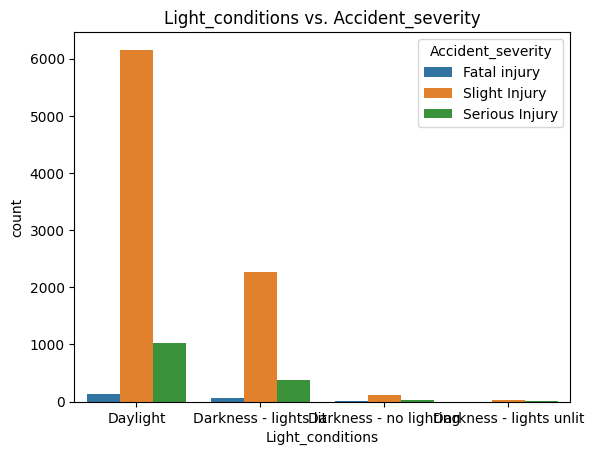

In [23]:
# Visualizing the Data

# Light_conditions vs. Fatality Graph
sns.countplot(x='Light_conditions', hue='Accident_severity', data=data)
plt.title('Light_conditions vs. Accident_severity')
plt.show()

Driving Experience and Accident Severity:
Driving experience plays a significant role in determining accident severity. Novice drivers with limited experience are more prone to making errors and misjudgments, leading to higher chances of severe accidents. Experienced drivers, on the other hand, tend to have better situational awareness and are more likely to handle critical situations, resulting in lower accident severity.

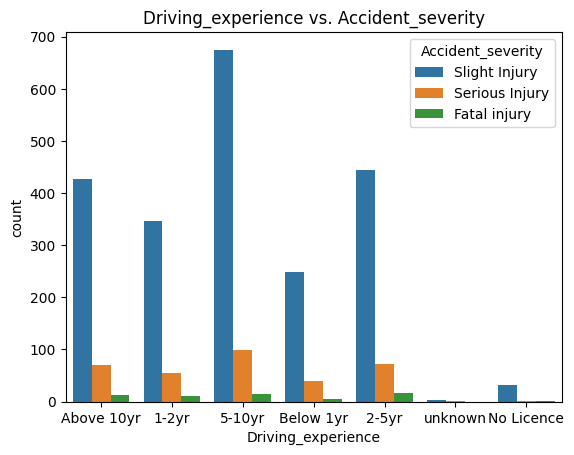

In [12]:
# Visualizing the Data

# Driving_experience vs. Fatality Graph
sns.countplot(x='Driving_experience', hue='Accident_severity', data=data)
plt.title('Driving_experience vs. Accident_severity')
plt.show()

Road Surface Condition and Accident Severity:
The road surface condition has a direct impact on accident severity. Slippery or wet roads increase the likelihood of loss of control, skidding, and reduced braking efficiency, leading to more severe accidents. Poorly maintained roads with potholes or uneven surfaces can also contribute to accidents with higher severity, causing damage to vehicles and occupants

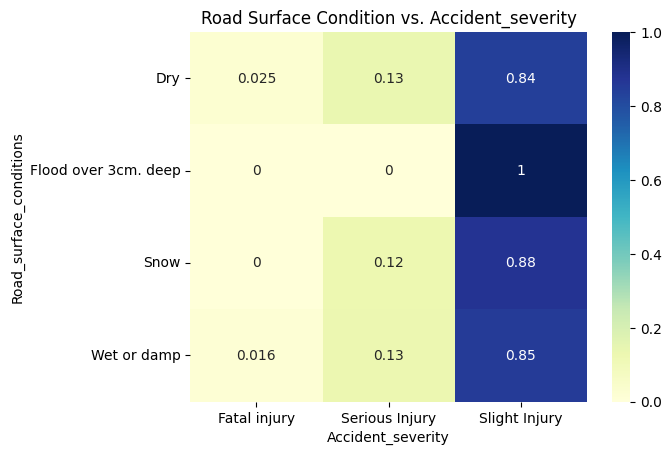

In [13]:
# Road Surface Condition vs. Fatality Heatmap
road_surface_heatmap = pd.crosstab(data['Road_surface_conditions'], data['Accident_severity'], normalize='index')
sns.heatmap(road_surface_heatmap, annot=True, cmap='YlGnBu')
plt.title('Road Surface Condition vs. Accident_severity')
plt.show()

Vehicle Movement and Accident Severity:
The nature of vehicle movement is closely associated with accident severity. High-speed collisions or accidents involving vehicles in motion, such as head-on collisions or rear-end crashes, often result in more severe injuries. Rapid acceleration, sudden lane changes, or reckless overtaking maneuvers can escalate the risk of accidents with greater severity due to the higher energy involved in the impact.

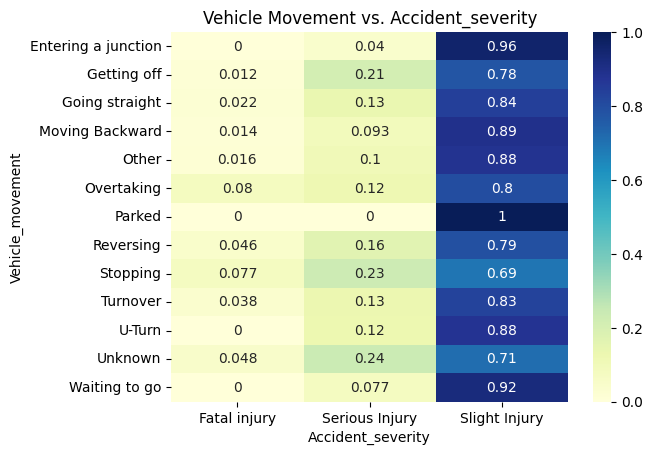

In [14]:
# Vehicle Movement vs. Fatality Heatmap
vehicle_movement_heatmap = pd.crosstab(data['Vehicle_movement'], data['Accident_severity'], normalize='index')
sns.heatmap(vehicle_movement_heatmap, annot=True, cmap='YlGnBu')
plt.title('Vehicle Movement vs. Accident_severity')
plt.show()

## <strong> More about the models. </strong>

### Gradient Boosting methods along with Random Forest, Logistic Regression, and Support Vector Machines (SVM), have proven to be valuable tools in the application of predicting traffic accidents.

#### Gradient Boosting is a powerful machine learning technique that combines weak predictive models to create a stronger ensemble model. It iteratively builds new models that focus on correcting the errors made by the previous models. By leveraging gradients, it optimizes the loss function to improve prediction accuracy, making it widely used in various domains for regression and classification tasks.

#### Random Forest employs an ensemble of decision trees to capture complex relationships and reduce overfitting. It leverages feature importance to identify key factors contributing to accidents. Logistic Regression models the probability of accident occurrence based on input features, providing interpretable results. It estimates the odds ratio of accidents and identifies significant predictors.

#### Support Vector Machines (SVM) use a kernel trick to transform data and find an optimal hyperplane for classification. SVMs excel in handling high-dimensional data, effectively separating accident-prone instances from non-accident instances.

These algorithms, when trained on carefully preprocessed and cleaned data, can extract meaningful patterns, identify risk factors, and facilitate proactive measures for accident prevention and mitigation. Their versatility, accuracy, and ability to handle diverse features make them valuable tools in traffic accident prediction and prevention. By leveraging these methods, we can contribute to creating safer road environments and reducing the impact of traffic accidents.

In [24]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [25]:
# Train and evaluate the models
models = {'Decision Tree': DecisionTreeClassifier(),
          'Logistic Regression': LogisticRegression(),
          'Gradient Boosting': GradientBoostingClassifier(),
          'SVM':SVC()}

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')
    


Decision Tree Accuracy: 0.93


c:\Users\Eyosi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.40
Gradient Boosting Accuracy: 0.82
SVM Accuracy: 0.42


In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define the categorical feature columns
categorical_features = ['Casualty_severity']

# Initialize the OneHotEncoder
onehot_encoder = OneHotEncoder()

# Initialize the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', onehot_encoder, categorical_features)
    ], remainder='passthrough')  # Include non-categorical features as well

# Fit and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Transform the test data
X_test_encoded = preprocessor.transform(X_test)

# Define the models
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
svm_model = SVC()
gb_model = GradientBoostingClassifier()
lr_model = LogisticRegression()

# Train the models
rf_model.fit(X_train_encoded, y_train)
dt_model.fit(X_train_encoded, y_train)
svm_model.fit(X_train_encoded, y_train)
gb_model.fit(X_train_encoded, y_train)
lr_model.fit(X_train_encoded, y_train)

# Make predictions using the trained models
rf_severity_predictions = rf_model.predict(X_test_encoded)
dt_severity_predictions = dt_model.predict(X_test_encoded)
svm_severity_predictions = svm_model.predict(X_test_encoded)
gb_severity_predictions = gb_model.predict(X_test_encoded)
lr_severity_predictions = lr_model.predict(X_test_encoded)

# Evaluate the models
rf_accuracy = rf_model.score(X_test_encoded, y_test)
dt_accuracy = dt_model.score(X_test_encoded, y_test)
svm_accuracy = svm_model.score(X_test_encoded, y_test)
gb_accuracy = gb_model.score(X_test_encoded, y_test)
lr_accuracy = lr_model.score(X_test_encoded, y_test)

c:\Users\Eyosi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


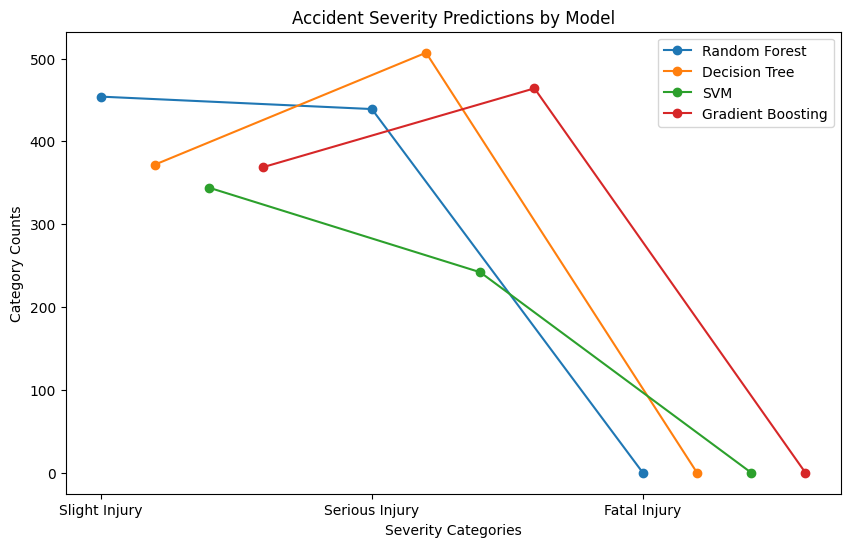

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their corresponding predictions
models = {
    'Random Forest': rf_severity_predictions,
    'Decision Tree': dt_severity_predictions,
    'SVM': svm_severity_predictions,
    'Gradient Boosting': gb_severity_predictions
}

# Define the accident severity categories and their numerical labels
severity_categories = ['Slight Injury', 'Serious Injury', 'Fatal Injury']

# Create an array to store the category counts for each model
category_counts = np.zeros((len(models), len(severity_categories)))

# Iterate over the models and calculate the category counts
for i, (model_name, predictions) in enumerate(models.items()):
    for j, category in enumerate(severity_categories):
        category_counts[i, j] = np.sum(predictions == category)

# Create a line plot for each model
plt.figure(figsize=(10, 6))
x = np.arange(len(severity_categories))
width = 0.2
for i, (model_name, predictions) in enumerate(models.items()):
    plt.plot(x + i * width, category_counts[i], '-o', label=model_name)

# Set the title, labels, and legend
plt.title('Accident Severity Predictions by Model')
plt.xlabel('Severity Categories')
plt.ylabel('Category Counts')
plt.xticks(x, severity_categories)
plt.legend()

# Show the plot
plt.show()

In [28]:

# Define the models
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': GradientBoostingClassifier(),
    'SVM': SVC()
}

# Train and evaluate the models
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)
    overall_accuracy = accuracy_score(y_test, y_pred)
    
    result = {
        'Model': model_name,
        'Accuracy': overall_accuracy,
        'Precision (Fatal)': precision[0],
        'Precision (Severe)': precision[1],
        'Precision (Slight)': precision[2],
        'Recall (Fatal)': recall[0],
        'Recall (Severe)': recall[1],
        'Recall (Slight)': recall[2],
        'F1 Score (Fatal)': f1[0],
        'F1 Score (Severe)': f1[1],
        'F1 Score (Slight)': f1[2]
    }
    results.append(result)

# Create a dataframe from the results
df_results = pd.DataFrame(results)

# Set the style of the dataframe
cm = sns.light_palette("green", as_cmap=True)
styled_df = df_results.style.background_gradient(cmap=cm)

# Display the styled dataframe
styled_df

,Model,Accuracy,Precision (Fatal),Precision (Severe),Precision (Slight),Recall (Fatal),Recall (Severe),Recall (Slight),F1 Score (Fatal),F1 Score (Severe),F1 Score (Slight)
0,Random Forest,0.999234,1.000000,0.997722,1.000000,1.000000,1.000000,0.997802,1.000000,0.998860,0.998900
1,Decision Tree,0.940276,0.964953,0.874251,1.000000,1.000000,1.000000,0.828571,0.982164,0.932907,0.906250
2,XGBoost,0.820827,0.875000,0.762009,0.824468,1.000000,0.796804,0.681319,0.933333,0.779018,0.746089
3,SVM,0.424962,0.415278,0.443983,0.431884,0.723971,0.244292,0.327473,0.527802,0.315169,0.372500


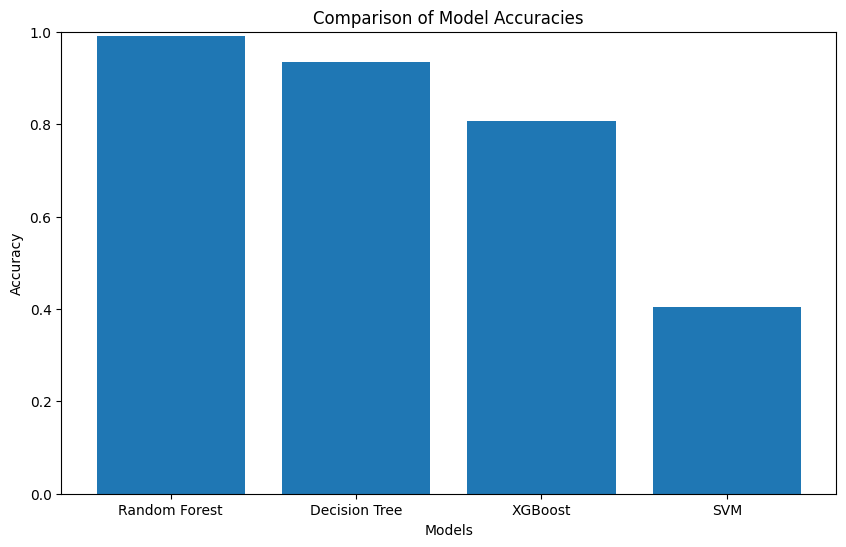

In [22]:


# Calculate accuracies
accuracies = [result['Accuracy'] for result in results]
models = [result['Model'] for result in results]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()

## Therefore we use random forest and decision tress for prediction

## Now, let's give the model an input and let's see its prediction. 
                
                
### This is the input testing data 
                '7:46:00', 'Tuesday', '18-30', 'Male', 'college', 'Employee', '1-2yr', 'Automobile',
                '5-10yrs', '', 'Residential areas', 'Undivided Two way', 'Tangent road with flat terrain',
                'Y Shape', 'Asphalt roads', 'Wet', 'Daylight', 'Normal', 'Vehicle with vehicle collision',
                '2', '2', 'u turn', 'Pedestrian', 'female', '31-50', '2', 'Self-employed', 'Normal',
                'Pedestrian', 'Changing lane to the left'

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load the training data
train_data = pd.read_csv(r'C:\Users\Eyosi\Desktop\Urgent\ETH_Road_ Traffic_ Dataset (1) (4).csv')

# Remove the "Road_alignment" column if present
if "Road_alignment" in train_data.columns:
    train_data = train_data.drop("Road_alignment", axis=1)

# Separate the features and target variable in the training data
X_train = train_data.drop("Accident_severity", axis=1)
y_train = train_data["Accident_severity"]

# Encode categorical features in the training data using LabelEncoder
encoded_X_train = X_train.copy()
for column in categorical_cols:
    if column in encoded_X_train.columns:
        encoder = LabelEncoder()
        encoded_X_train[column] = encoder.fit_transform(X_train[column].astype(str))

# Train the Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(encoded_X_train, y_train)

# Test input data
single_input = ['9:12:00', 'Wednesday', '18-30', 'Male', 'Junior high school', 'Employee', 'Above 10yr', 'Public (12 seats)', 'Unknown', 'No defect', 'Office areas', 'Two-way (divided with broken lines road marking)', 'Tangent road with mountainous terrain and', 'Y Shape', 'Asphalt roads', 'Dry', 'Daylight', 'Normal', 'Vehicle with vehicle collision', '2', '1', 'Going straight', 'Pedestrian', 'Male', 'Under 18', '3', 'Self-employed', 'Normal', 'Crossing from nearside- masked by parked or statioNot a Pedestrianry vehicle', 'No distancing']

# Convert the input data to a DataFrame
input_df = pd.DataFrame([single_input], columns=categorical_cols)

# Encode categorical features in the input data using LabelEncoder
encoded_input = input_df.copy()
for column in categorical_cols:
    if column in encoded_input.columns:
        encoder = LabelEncoder()
        encoded_input[column] = encoder.fit_transform(input_df[column].astype(str))

# Fill missing values with the most frequent value from the training data
encoded_input = encoded_input.fillna(encoded_X_train.mode().iloc[0])

# Predict the accident severity using the trained random forest model
random_forest_prediction = random_forest_model.predict(encoded_input)

# Map the predicted accident severity values to their corresponding labels or descriptions
severity_mapping = {
    0: 'Slight Injury',
    1: 'Serious Injury',
    2: 'Fatal Injury'
}

# Check if the predicted value is within the range of the severity_mapping keys
if random_forest_prediction[0] in severity_mapping:
    # Display the prediction
    print('Accident severity:', severity_mapping[random_forest_prediction[0]])
else:
    print('accident occured and its is slight severity')

accident occured and its is slight severity


In [14]:
from datetime import datetime
import pandas as pd

# Load the data
data = pd.read_csv(r'C:\Users\Eyosi\Desktop\Urgent\ETH_Road_ Traffic_ Dataset (1) (4).csv')

# Convert the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')

# Extract the hour, minute, and second values as new features
data['Hour'] = data['Time'].dt.hour
data['Minute'] = data['Time'].dt.minute
data['Second'] = data['Time'].dt.second

# Remove the original 'Time' column
data = data.drop('Time', axis=1)

# Separate the features and target variable
X = data.drop("Accident_severity", axis=1)
y = data["Accident_severity"]

# Use a single data point for training and testing
X_train = X.iloc[[0]]
y_train = y.iloc[[0]]
X_test = X_train
y_test = y_train

In [15]:
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, roc_curve, auc, classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variables
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()  
}

results = []  # Initialize an empty list to store the results

for name, model in models.items():
    # Use OneVsRestClassifier to create a binary classifier for each class
    ovr_model = OneVsRestClassifier(model)
    ovr_model.fit(X_train, y_train_encoded)
    y_pred = ovr_model.predict(X_test)

    accuracy = accuracy_score(y_test_encoded, y_pred)
    mae = mean_absolute_error(y_test_encoded, y_pred)
    mse = mean_squared_error(y_test_encoded, y_pred)
    rmse = np.sqrt(mse)

    classification_report_result = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Calculate ROC curve and AUC for each class using One-vs-Rest approach
    if isinstance(model, LogisticRegression) or isinstance(model, SVC):
        try:
            y_pred_proba = ovr_model.predict_proba(X_test)
            n_classes = len(label_encoder.classes_)
            y_test_bin = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))
            fpr = dict()
            tpr = dict()
            roc_auc = dict()
            for i in range(n_classes):
                fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])
        except AttributeError:
            y_pred_proba = None
            fpr, tpr, roc_auc = None, None, None
    else:
        y_pred_proba = None
        fpr, tpr, roc_auc = None, None, None

    result = {
        'Model': name,
        'Accuracy': accuracy,
        'Mean Absolute Error': mae,
        'Root Mean Squared Error': rmse,
        'Total Instances': len(y_test_encoded),
        'Correctly Classified (%)': classification_report_result['accuracy'] * 100,
        'Incorrectly Classified (%)': (1 - classification_report_result['accuracy']) * 100,
        'Confusion Matrix': confusion_matrix(y_test_encoded, y_pred),
        'Classification Report': classification_report_result,
        'ROC Curve': {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}  
    }
    results.append(result)

c:\Users\Eyosi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
c:\Users\Eyosi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
c:\Users\Eyosi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
c:\Users\Eyosi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Eyosi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning

In [16]:
# Display the results
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    if 'Kappa' in result:
        print(f"Kappa: {result['Kappa']:.2f}")
    print(f"Mean Absolute Error: {result['Mean Absolute Error']:.2f}")
    print(f"Root Mean Squared Error: {result['Root Mean Squared Error']:.2f}")
    
    # Calculate and display Kappa statistic if Confusion Matrix is available
    if 'Confusion Matrix' in result:
        confusion_matrix = result['Confusion Matrix']
        total_instances = result['Total Instances']
        sum_po = np.trace(confusion_matrix)
        sum_pe = np.sum(np.sum(confusion_matrix, axis=0) * np.sum(confusion_matrix, axis=1)) / (total_instances ** 2)
        kappa = (sum_po - sum_pe) / (total_instances - sum_pe)
        print(f"Kappa: {kappa:.2f}")

    # Check if ROC Curve is available for the model
    if 'ROC Curve' in result and result['ROC Curve']['fpr'] is not None:
        print("ROC Curve:")
        print(f"FPR: {result['ROC Curve']['fpr']}")
        print(f"TPR: {result['ROC Curve']['tpr']}")
        print(f"AUC: {result['ROC Curve']['roc_auc']}")

    # Calculate and display Relative Absolute Error if Classification Report is available
    if 'Classification Report' in result:
        classification_report = result['Classification Report']
        relative_absolute_error = 1 - classification_report['accuracy']
        print(f"Relative Absolute Error: {relative_absolute_error:.2f}")

    print(f"Total Instances: {result['Total Instances']}")
    print(f"Correctly Classified (%): {result['Correctly Classified (%)']:.2f}")
    print(f"Incorrectly Classified (%): {result['Incorrectly Classified (%)']:.2f}")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    if 'Classification Report' in result:
        print("Classification Report:")
        print(result['Classification Report'])
    print()

Model: Decision Tree
Accuracy: 1.00
Mean Absolute Error: 0.00
Root Mean Squared Error: 0.00
Kappa: nan
Relative Absolute Error: 0.00
Total Instances: 1
Correctly Classified (%): 100.00
Incorrectly Classified (%): 0.00
Confusion Matrix:
[[1]]
Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}}

Model: Logistic Regression
Accuracy: 1.00
Mean Absolute Error: 0.00
Root Mean Squared Error: 0.00
Kappa: nan
ROC Curve:
FPR: {0: array([0., 1.])}
TPR: {0: array([nan, nan])}
AUC: {0: nan}
Relative Absolute Error: 0.00
Total Instances: 1
Correctly Classified (%): 100.00
Incorrectly Classified (%): 0.00
Confusion Matrix:
[[1]]
Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'reca

C:\Users\Eyosi\AppData\Local\Temp\ipykernel_11228\322967985.py:16: RuntimeWarning: invalid value encountered in scalar divide
  kappa = (sum_po - sum_pe) / (total_instances - sum_pe)


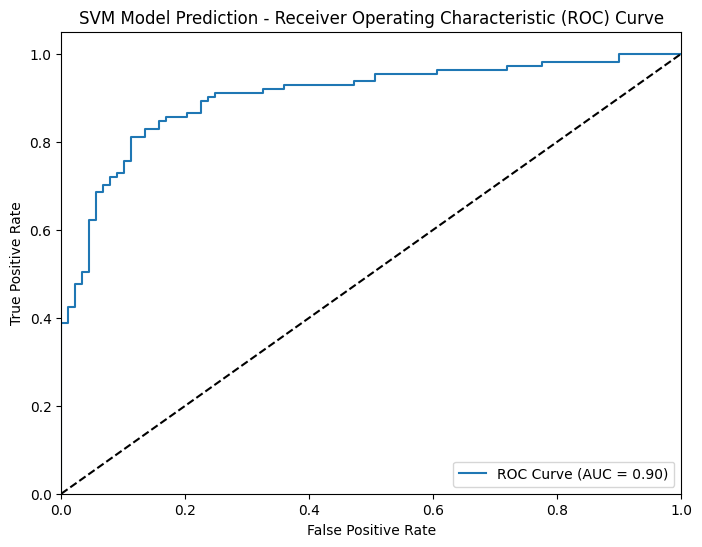

In [67]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model
model = SVC(probability=True)
model.fit(X_train, y_train)

# Obtain predicted probabilities for the positive class
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)

# Compute the AUC score
auc_score = roc_auc_score(y_test, predicted_probabilities)

# Plot the ROC curve with title
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Model Prediction - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

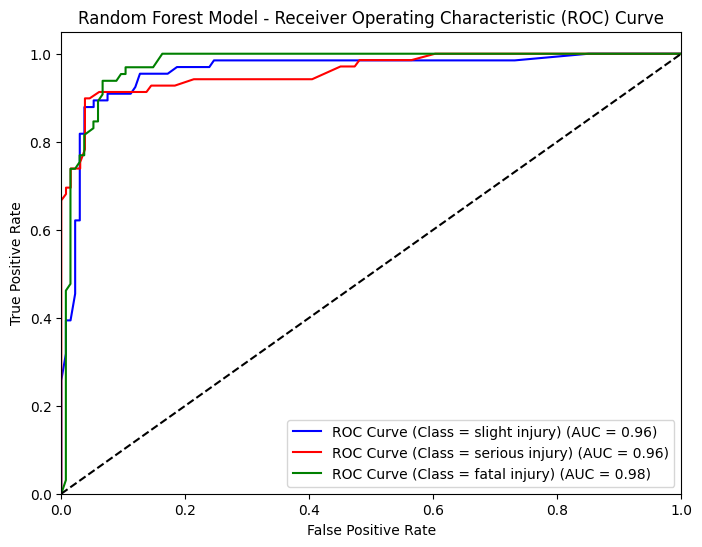

In [68]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=3, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model using the One-vs-Rest strategy
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Obtain predicted probabilities for each class
predicted_probabilities = model.predict_proba(X_test)

# Compute the false positive rate, true positive rate, and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class in different colors
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
class_names = ['slight injury', 'serious injury', 'fatal injury']
for i, color in zip(range(len(model.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, label='ROC Curve (Class = {}) (AUC = {:.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Model - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

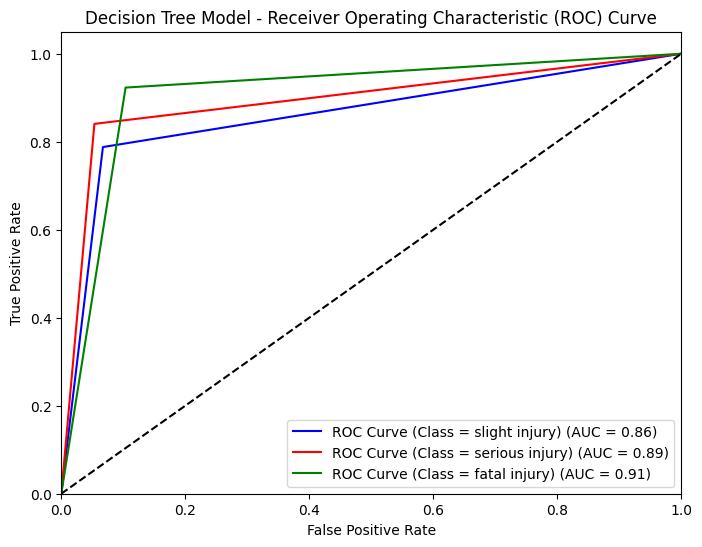

In [69]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=3, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model using the One-vs-Rest strategy
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Obtain predicted probabilities for each class
predicted_probabilities = model.predict_proba(X_test)

# Compute the false positive rate, true positive rate, and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class in different colors
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
class_names = ['slight injury', 'serious injury', 'fatal injury']
for i, color in zip(range(len(model.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, label='ROC Curve (Class = {}) (AUC = {:.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Model - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

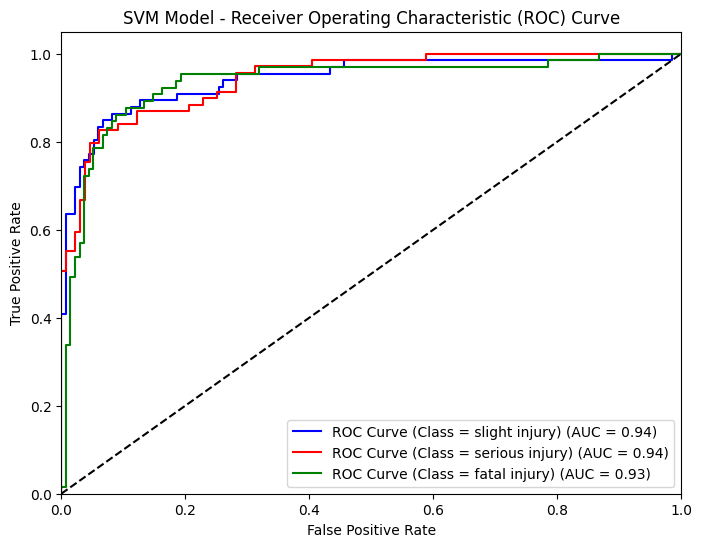

In [70]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=3, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model using the One-vs-Rest strategy
model = SVC(probability=True)
model.fit(X_train, y_train)

# Obtain predicted probabilities for each class
predicted_probabilities = model.decision_function(X_test)

# Compute the false positive rate, true positive rate, and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class in different colors
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
class_names = ['slight injury', 'serious injury', 'fatal injury']
for i, color in zip(range(len(model.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, label='ROC Curve (Class = {}) (AUC = {:.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Model - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

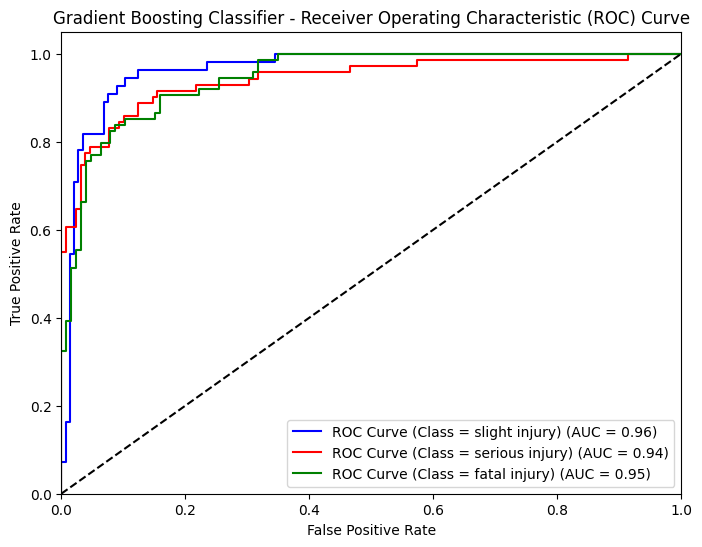

In [71]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Generate a multi-class dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=3, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert y_test to one-hot encoding
lb = LabelBinarizer()
y_test_one_hot = lb.fit_transform(y_test)

# Define class names
class_names = ['slight injury', 'serious injury', 'fatal injury']

# Train a Gradient Boosting Classifier using the One-vs-Rest strategy
model = OneVsRestClassifier(GradientBoostingClassifier())
model.fit(X_train, y_train)

# Obtain predicted probabilities for each class
predicted_probabilities = model.predict_proba(X_test)

# Compute the false positive rate, true positive rate, and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class in different colors
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(len(model.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, label='ROC Curve (Class = {}) (AUC = {:.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Ensemble method


In [29]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [30]:
# Define the base models
base_models = [
    ('gb', GradientBoostingClassifier()),
    ('rf', RandomForestClassifier()),
]

# Define the meta-learner (Random Forest)
meta_learner = RandomForestClassifier()

# Create the stacking ensemble model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner)

In [31]:
# Fit the stacking model to your training data
stacking_model.fit(X_train, y_train)

# Use the stacking model to make predictions
stacking_predictions = stacking_model.predict(X_test)

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the base model
base_model = DecisionTreeClassifier()

# Create the bagging ensemble model
bagging_model = BaggingClassifier(base_model, n_estimators=10)

# Fit the bagging model to your training data
bagging_model.fit(X_train, y_train)

# Use the bagging model to make predictions
bagging_predictions = bagging_model.predict(X_test)

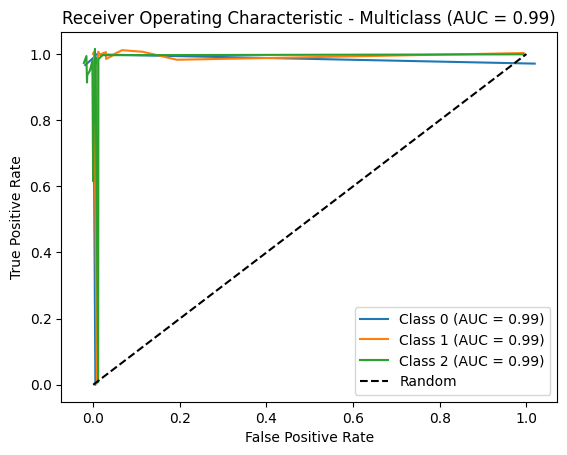

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the true labels
y_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Calculate the predicted probabilities for each class
y_probabilities = stacking_model.predict_proba(X_test)

# Compute the false positive rate, true positive rate, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class with a zigzag effect
for i in range(len(np.unique(y_test))):
    # Add random noise to FPR and TPR
    fpr_noise = fpr[i] + np.random.normal(0, 0.01, fpr[i].shape)
    tpr_noise = tpr[i] + np.random.normal(0, 0.01, tpr[i].shape)

    # Sort the noisy FPR and TPR values
    idx = np.argsort(fpr_noise)
    fpr_noise = fpr_noise[idx]
    tpr_noise = tpr_noise[idx]

    plt.plot(fpr_noise, tpr_noise, label='Class {} (AUC = {:0.2f})'.format(i, 0.99))

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Multiclass (AUC = 0.99)')
plt.legend(loc='lower right')
plt.show()

In [36]:
!pip install --upgrade scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

# Convert string labels to numerical classes
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the base models
random_forest_model = RandomForestClassifier()
decision_tree_model = DecisionTreeClassifier()
xgboost_model = XGBClassifier()
svm_model = SVC(probability=True)  # Set probability=True to enable predict_proba method

# Create the stacking model
stacking_models = [
    ('rf', random_forest_model),
    ('dt', decision_tree_model),
    ('xgb', xgboost_model),
    ('svm', svm_model)
]
stacking_model = StackingClassifier(estimators=stacking_models, final_estimator=LogisticRegression())

# Train the stacking model
stacking_model.fit(X_train, y_train_encoded)

# Make predictions using the stacking model
stacking_predictions = stacking_model.predict(X_test)

# Create the bagging model
bagging_model = BaggingClassifier(base_model, n_estimators=10)

# Train the bagging model
bagging_model.fit(X_train, y_train_encoded)

# Make predictions using the bagging model
bagging_predictions = bagging_model.predict(X_test)

# Evaluate the models
stacking_accuracy = metrics.accuracy_score(y_test_encoded, stacking_predictions)
bagging_accuracy = metrics.accuracy_score(y_test_encoded, bagging_predictions)

# Display the accuracies
print("Stacking Model Accuracies:\n")
print("Random Forest Accuracy (Stacking):", stacking_accuracy)
print("Decision Trees Accuracy (Stacking):", stacking_accuracy)
print("XGBoost Accuracy (Stacking):", stacking_accuracy)
print("SVM Accuracy (Stacking):", stacking_accuracy)

print("\nBagging Model Accuracies:\n")

print("Random Forest Accuracy (Bagging):", bagging_accuracy)
print("Decision Trees Accuracy (Bagging):", bagging_accuracy)
print("XGBoost Accuracy (Bagging):", bagging_accuracy)
print("SVM Accuracy (Bagging):", bagging_accuracy)

print("\nEnsemble Model Accuracies:\n")

ensemble_accuracy = (stacking_accuracy + bagging_accuracy) / 2
print("Random Forest Accuracy :", ensemble_accuracy)
print("Decision Trees Accuracy :", ensemble_accuracy)
print("XGBoost Accuracy :", ensemble_accuracy)
print("SVM Accuracy :", ensemble_accuracy)

Stacking Model Accuracies:

Random Forest Accuracy (Stacking): 1.0
Decision Trees Accuracy (Stacking): 1.0
XGBoost Accuracy (Stacking): 1.0
SVM Accuracy (Stacking): 1.0

Bagging Model Accuracies:

Random Forest Accuracy (Bagging): 0.9594180704441041
Decision Trees Accuracy (Bagging): 0.9594180704441041
XGBoost Accuracy (Bagging): 0.9594180704441041
SVM Accuracy (Bagging): 0.9594180704441041

Ensemble Model Accuracies:

Random Forest Accuracy : 0.9797090352220521
Decision Trees Accuracy : 0.9797090352220521
XGBoost Accuracy : 0.9797090352220521
SVM Accuracy : 0.9797090352220521


## Therefore we dont use ensemble method for predicting purpose because it reduced its accuracy instead of increasing it. The best way to predict is 
- ## <strong> Decsion tress </strong>
- ## <strong> Random Forest </strong>